In [7]:
#On importe pour ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

# On importe les packages nécessaires pour la manipulation des données

In [8]:
# --- Core Data Manipulation Libraries ---
import numpy as np
import pandas as pd
from datetime import datetime
import os
import sys
import json
from pathlib import Path

In [9]:
def print_divider(title="", width=80, style="="):
    """
    Create a formatted section divider for better readability
    """
    if title:
        side_width = (width - len(title) - 2) // 2
        print(f"\n{style * side_width} {title} {style * side_width}")
    else:
        print(f"\n{style * width}")

def describe_dataframe(df, name="DataFrame"):
    """
    Comprehensive DataFrame description with memory usage and data types
    """
    print_divider(f"{name} Overview")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"\nData Types:")
    print(df.dtypes.value_counts())
    print(f"\nMissing Values: {df.isnull().sum().sum()}")
    print(f"Duplicate Rows: {df.duplicated().sum()}")
    
    return df.info()

def calculate_vif(df, features):
    """
    Calculate Variance Inflation Factor for multicollinearity detection
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) 
                       for i in range(len(features))]
    return vif_data.sort_values('VIF', ascending=False)

# 1. Chargement des données

In [11]:
# ============================================================================
# Chargement des données et inspection initiale
# ============================================================================

print_divider("PHASE DE CHARGEMENT DES DONNÉES", style="=")

# Define the data path
DATA_PATH = '../data/raw/dirty_v3_path.csv'

# Load data with error handling
try:
    # Load the dataset
    df_raw = pd.read_csv(DATA_PATH)
    print(f"✅ Data loaded successfully from: {DATA_PATH}")
    
    # Create a backup of raw data
    df = df_raw.copy()
    print("✅ Backup of raw data created")
    
except FileNotFoundError:
    print(f"❌ Error: File not found at {DATA_PATH}")
    print("Please check the file path and try again.")
except Exception as e:
    print(f"❌ Unexpected error: {e}")

# Initial data inspection
describe_dataframe(df, "Healthcare Dataset")


======================= PHASE DE CHARGEMENT DES DONNÉES =======================
✅ Data loaded successfully from: ../data/raw/dirty_v3_path.csv
✅ Backup of raw data created

========================= Healthcare Dataset Overview =========================
Shape: 30000 rows × 20 columns
Memory Usage: 8.39 MB

Data Types:
float64    13
int64       4
object      3
Name: count, dtype: int64

Missing Values: 22500
Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 

## 1.1 Premier regard sur les données

In [12]:
print_divider("10 premières données", style="=")
display(df.head(10))

print_divider("10 dernières données", style="=")
display(df.tail(10))

print_divider("10 données aléatoires", style="=")
display(df.sample(10))

print_divider("Statistiques descriptives", style="=")
display(df.describe(include='all').round(2))


============================= 10 premières données =============================


Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0  46.0    Male          Diabetes   137.04          135.27  28.90   
1  22.0    Male           Healthy    71.58          113.27  26.29   
2  50.0     NaN            Asthma    95.24             NaN  22.53   
3  57.0     NaN           Obesity      NaN          130.53  38.47   
4  66.0  Female      Hypertension    95.15          178.17  31.12   
5  50.0    Male      Hypertension   107.00          171.80  25.33   
6  80.0    Male      Hypertension      NaN          174.52  29.87   
7  50.0    Male            Cancer      NaN          136.13  26.37   
8  60.0  Female           Obesity      NaN             NaN  35.49   
9  13.0  Female            Asthma    90.60          126.88  29.24   

   Oxygen Saturation  LengthOfStay  Cholesterol  Triglycerides  HbA1c  \
0              96.04             6       231.88         210.56   7.61   
1              97.54             2       165.57         129.41   4.91   
2              90.31             2       214.94         165.35   5.60   
3              96.60             5       197.71         182.13   6.92   
4              94.90             4       259.53         115.85   5.98   
5              95.21             5       233.10         203.67   5.48   
6              97.96             3       247.11         128.27   5.99   
7              82.72            19       209.26         137.79   6.23   
8              98.62             3       264.69         194.21   6.83   
9              97.96             6       193.44         163.65   6.18   

   Smoking  Alcohol  Physical Activity  Diet Score  Family History  \
0        0        0              -0.20        3.54               0   
1        0        0               8.12        5.90               0   
2        0        0               5.01        4.65               1   
3        0        0               3.16        3.37               0   
4        0        1               3.56        3.40               0   
5        1        0               5.01        4.65               0   
6        1        1               1.92        5.76               1   
7        1        0               5.34        3.34               0   
8        0        0               1.66        2.99               0   
9        1        0               5.27        5.63               0   

   Stress Level  Sleep Hours random_notes   noise_col  
0          5.07         6.05        lorem -137.057211  
1          5.87         7.72        ipsum  -11.230610  
2          3.09         4.82        ipsum   98.331195  
3          3.01         5.33        lorem   44.187175  
4          6.38         6.64        lorem   44.831426  
5          7.25         6.35        ipsum  108.411983  
6          8.25         7.23        ipsum    7.009539  
7          8.76         4.94          ###   64.247308  
8          5.93         5.87        lorem   45.855558  
9          7.09         5.41        lorem  -45.916696


============================= 10 dernières données =============================


Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
29990  43.0    Male          Diabetes      NaN          132.31  19.80   
29991  63.0     NaN         Arthritis   104.98          104.02  26.91   
29992  62.0    Male      Hypertension      NaN          105.42  27.18   
29993  48.0  Female               NaN   107.09          163.32  34.40   
29994  76.0     NaN      Hypertension    97.17          138.92  25.65   
29995  54.0  Female           Healthy    86.35          127.68  28.30   
29996  41.0    Male            Asthma    89.24          154.37  24.93   
29997  83.0  Female               NaN      NaN          170.11  30.55   
29998  41.0    Male          Diabetes   242.87          152.97  23.57   
29999  46.0  Female      Hypertension    86.52          159.26  34.55   

       Oxygen Saturation  LengthOfStay  Cholesterol  Triglycerides  HbA1c  \
29990              94.04             3       190.63         146.06   7.93   
29991              97.90             4       203.70         230.14   6.00   
29992              95.31             2       183.59         192.10   6.36   
29993              94.47             2       236.15         181.37   5.43   
29994              93.99             3       235.65         238.26   6.43   
29995              94.36             1       218.60         152.82   4.85   
29996              96.07             4       198.30         176.81   5.36   
29997              97.83             3       210.13         168.76   5.05   
29998              99.17             3       208.86         224.21   7.59   
29999              96.60             4       217.37         141.28   5.77   

       Smoking  Alcohol  Physical Activity  Diet Score  Family History  \
29990        0        0               4.13        3.73               1   
29991        0        1               3.18        0.99               1   
29992        1        1               5.40        4.93               0   
29993        0        0               4.43        4.93               1   
29994        0        0               3.14        3.46               0   
29995        0        0               9.15       10.35               0   
29996        1        0               3.34        3.40               0   
29997        0        0               4.53        4.50               0   
29998        0        0               3.16        2.59               0   
29999        1        0               4.91        5.82               1   

       Stress Level  Sleep Hours random_notes   noise_col  
29990          3.75         6.90           ??  122.467920  
29991          5.04         6.85        ipsum  -56.102577  
29992          5.46         3.99        lorem  140.731299  
29993          7.55         3.72        lorem  -35.728961  
29994          6.66         6.10        ipsum   37.705013  
29995          3.65         8.71        ipsum   89.573837  
29996          6.72         2.81        lorem   -5.864517  
29997          4.31         3.61          ###  -30.934595  
29998          7.10         5.80        ipsum    5.085258  
29999          3.64         5.47        lorem -142.559559


============================ 10 données aléatoires ============================


Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
29058  65.0  Female          Diabetes   129.27          135.43  21.17   
10161  45.0     NaN           Obesity    96.06          128.43  37.31   
28031  70.0    Male         Arthritis    97.93          147.90  27.53   
1282   36.0  Female               NaN    76.26          141.76  42.38   
6533   67.0  Female      Hypertension   108.46          165.12  22.21   
21373  55.0  Female      Hypertension      NaN          160.58  26.49   
13551  55.0  Female           Obesity   133.24          121.74  41.24   
18771  68.0    Male         Arthritis      NaN          128.46  23.22   
4624   55.0  Female           Healthy      NaN          133.70  18.94   
25165  72.0    Male         Arthritis    82.23          121.94  27.62   

       Oxygen Saturation  LengthOfStay  Cholesterol  Triglycerides  HbA1c  \
29058              96.00             8       177.80         215.29   6.51   
10161              93.56             4       201.70         268.03   6.79   
28031              97.42             4       217.79         198.47   5.84   
1282               99.80             4       182.95         238.01   7.07   
6533               98.48             3       229.66         274.01   6.44   
21373              93.04             3       246.08         167.74   6.21   
13551              99.66             4       175.35         269.65   5.93   
18771              95.51             3       183.76         167.13   5.44   
4624               94.71             1       192.97         137.08   4.97   
25165              97.31             2       175.54         180.09   5.20   

       Smoking  Alcohol  Physical Activity  Diet Score  Family History  \
29058        0        0               1.22        2.64               1   
10161        0        1               2.68        4.63               1   
28031        0        0               3.31        3.95               1   
1282         0        1               2.15        2.74               0   
6533         0        1               2.24        4.62               0   
21373        1        1               4.34        5.19               1   
13551        0        0               2.23        2.30               0   
18771        0        0               4.78        5.05               0   
4624         0        0               8.89        4.71               0   
25165        0        0               2.00        2.90               0   

       Stress Level  Sleep Hours random_notes   noise_col  
29058          4.41         4.02        lorem   63.393519  
10161          6.54         6.80        ipsum   25.448777  
28031          5.55         6.95          ###  -99.646587  
1282           3.90         8.23        ipsum   72.850666  
6533           5.98         4.49        lorem  132.808752  
21373          6.19         5.21          ###   20.399004  
13551          7.15         6.21           ??  -61.681102  
18771          6.93         8.78           ??  -38.237746  
4624           3.98         9.82          ### -127.835098  
25165          2.97         7.59          ###    2.409389


========================== Statistiques descriptives ==========================


Age  Gender Medical Condition   Glucose  Blood Pressure  \
count   25500.00   25500             25500  25500.00        25500.00   
unique       NaN       2                 7       NaN             NaN   
top          NaN  Female      Hypertension       NaN             NaN   
freq         NaN   12865              7120       NaN             NaN   
mean       54.62     NaN               NaN    123.62          140.46   
std        15.97     NaN               NaN     41.58           21.08   
min        10.00     NaN               NaN     20.32           74.24   
25%        45.00     NaN               NaN     96.28          125.14   
50%        55.00     NaN               NaN    110.50          138.32   
75%        66.00     NaN               NaN    136.61          153.79   
max        89.00     NaN               NaN    318.51          226.38   

             BMI  Oxygen Saturation  LengthOfStay  Cholesterol  Triglycerides  \
count   30000.00           30000.00      30000.00     30000.00       30000.00   
unique       NaN                NaN           NaN          NaN            NaN   
top          NaN                NaN           NaN          NaN            NaN   
freq         NaN                NaN           NaN          NaN            NaN   
mean       28.48              94.95          4.41       213.03         176.84   
std         5.73               3.74          2.76        33.52          48.81   
min         7.67              67.51          1.00        95.73         -22.48   
25%        24.59              93.00          3.00       189.50         141.28   
50%        28.05              95.30          4.00       211.84         173.36   
75%        31.81              97.38          5.00       235.31         208.63   
max        56.85             110.07         19.00       358.37         421.51   

           HbA1c   Smoking   Alcohol  Physical Activity  Diet Score  \
count   30000.00  30000.00  30000.00           30000.00    30000.00   
unique       NaN       NaN       NaN                NaN         NaN   
top          NaN       NaN       NaN                NaN         NaN   
freq         NaN       NaN       NaN                NaN         NaN   
mean        6.29      0.28      0.24               3.80        4.03   
std         1.32      0.45      0.43               2.01        1.82   
min         3.28      0.00      0.00              -3.68       -1.75   
25%         5.33      0.00      0.00               2.35        2.77   
50%         5.97      0.00      0.00               3.59        3.79   
75%         6.92      1.00      0.00               5.06        5.02   
max        12.36      1.00      1.00              12.41       12.06   

        Family History  Stress Level  Sleep Hours random_notes  noise_col  
count         30000.00      30000.00     30000.00        30000   30000.00  
unique             NaN           NaN          NaN            4        NaN  
top                NaN           NaN          NaN          ###        NaN  
freq               NaN           NaN          NaN         7575        NaN  
mean              0.44          5.92         6.23          NaN      -0.52  
std               0.50          2.23         1.19          NaN     100.08  
min               0.00         -2.44         1.59          NaN    -412.17  
25%               0.00          4.37         5.41          NaN     -68.27  
50%               0.00          5.90         6.23          NaN      -0.51  
75%               1.00          7.44         7.05          NaN      66.81  
max               1.00         15.45        10.35          NaN     467.89

## 1.2 Qualité des données

In [13]:
print_divider("DATA QUALITY REPORT", style="=")

# Create comprehensive quality report
quality_report = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Null %': (df.isnull().sum().values / len(df) * 100).round(2),
    'Unique Values': df.nunique().values,
    'Unique %': (df.nunique().values / len(df) * 100).round(2)
})

# Add additional metrics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    quality_report.loc[quality_report['Column'] == col, 'Min'] = df[col].min()
    quality_report.loc[quality_report['Column'] == col, 'Max'] = df[col].max()
    quality_report.loc[quality_report['Column'] == col, 'Mean'] = round(df[col].mean(), 2)
    quality_report.loc[quality_report['Column'] == col, 'Std'] = round(df[col].std(), 2)

display(quality_report)


============================= DATA QUALITY REPORT =============================


Column Data Type  Non-Null Count  Null Count  Null %  \
0                 Age   float64           25500        4500    15.0   
1              Gender    object           25500        4500    15.0   
2   Medical Condition    object           25500        4500    15.0   
3             Glucose   float64           25500        4500    15.0   
4      Blood Pressure   float64           25500        4500    15.0   
5                 BMI   float64           30000           0     0.0   
6   Oxygen Saturation   float64           30000           0     0.0   
7        LengthOfStay     int64           30000           0     0.0   
8         Cholesterol   float64           30000           0     0.0   
9       Triglycerides   float64           30000           0     0.0   
10              HbA1c   float64           30000           0     0.0   
11            Smoking     int64           30000           0     0.0   
12            Alcohol     int64           30000           0     0.0   
13  Physical Activity   float64           30000           0     0.0   
14         Diet Score   float64           30000           0     0.0   
15     Family History     int64           30000           0     0.0   
16       Stress Level   float64           30000           0     0.0   
17        Sleep Hours   float64           30000           0     0.0   
18       random_notes    object           30000           0     0.0   
19          noise_col   float64           30000           0     0.0   

    Unique Values  Unique %         Min        Max    Mean     Std  
0              80      0.27   10.000000   89.00000   54.62   15.97  
1               2      0.01         NaN        NaN     NaN     NaN  
2               7      0.02         NaN        NaN     NaN     NaN  
3           11097     36.99   20.320000  318.51000  123.62   41.58  
4            8259     27.53   74.240000  226.38000  140.46   21.08  
5            3097     10.32    7.670000   56.85000   28.48    5.73  
6            2267      7.56   67.510000  110.07000   94.95    3.74  
7              19      0.06    1.000000   19.00000    4.41    2.76  
8           12021     40.07   95.730000  358.37000  213.03   33.52  
9           14840     49.47  -22.480000  421.51000  176.84   48.81  
10            770      2.57    3.280000   12.36000    6.29    1.32  
11              2      0.01    0.000000    1.00000    0.28    0.45  
12              2      0.01    0.000000    1.00000    0.24    0.43  
13           1154      3.85   -3.680000   12.41000    3.80    2.01  
14           1103      3.68   -1.750000   12.06000    4.03    1.82  
15              2      0.01    0.000000    1.00000    0.44    0.50  
16           1300      4.33   -2.440000   15.45000    5.92    2.23  
17            745      2.48    1.590000   10.35000    6.23    1.19  
18              4      0.01         NaN        NaN     NaN     NaN  
19          30000    100.00 -412.169596  467.89491   -0.52  100.08

In [14]:
# Check for data anomalies
print_divider("DATA ANOMALY CHECK")

anomalies = []
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        anomalies.append(f"⚠️ {col}: {neg_count} valeurs négatives trouvées")
    else:
        print(f"✅ {col}: Aucune valeur négative trouvée")



============================== DATA ANOMALY CHECK ==============================
✅ Age: Aucune valeur négative trouvée
✅ Glucose: Aucune valeur négative trouvée
✅ Blood Pressure: Aucune valeur négative trouvée
✅ BMI: Aucune valeur négative trouvée
✅ Oxygen Saturation: Aucune valeur négative trouvée
✅ LengthOfStay: Aucune valeur négative trouvée
✅ Cholesterol: Aucune valeur négative trouvée
✅ HbA1c: Aucune valeur négative trouvée
✅ Smoking: Aucune valeur négative trouvée
✅ Alcohol: Aucune valeur négative trouvée
✅ Family History: Aucune valeur négative trouvée
✅ Sleep Hours: Aucune valeur négative trouvée


In [15]:
print_divider("Recherche d'éventuels doublons", style="=")

dup_count = df.duplicated().sum()
if dup_count > 0:
    print(f"⚠️ Attention: {dup_count} lignes dupliquées trouvées.")
    display(df[df.duplicated(keep=False)].sort_values(df.columns.tolist()))
else:
    print("✅ Aucune ligne dupliquée trouvée.")


======================== Recherche d'éventuels doublons ========================
✅ Aucune ligne dupliquée trouvée.


In [16]:
print_divider("Recherche des valeurs aberrantes", style="=")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_count = len(outliers)
    
    if outlier_count > 0:
        print(f"📊 {col}:")
        print(f"   - Outliers: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")
        print(f"   - Lower Bound: {lower_bound:.2f}")
        print(f"   - Upper Bound: {upper_bound:.2f}")
        print(f"   - Outlier Range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")


======================= Recherche des valeurs aberrantes =======================
📊 Age:
   - Outliers: 163 (0.54%)
   - Lower Bound: 13.50
   - Upper Bound: 97.50
   - Outlier Range: [10.00, 13.00]
📊 Glucose:
   - Outliers: 2177 (7.26%)
   - Lower Bound: 35.78
   - Upper Bound: 197.11
   - Outlier Range: [20.32, 318.51]
📊 Blood Pressure:
   - Outliers: 216 (0.72%)
   - Lower Bound: 82.17
   - Upper Bound: 196.76
   - Outlier Range: [74.24, 226.38]
📊 BMI:
   - Outliers: 552 (1.84%)
   - Lower Bound: 13.76
   - Upper Bound: 42.64
   - Outlier Range: [7.67, 56.85]
📊 Oxygen Saturation:
   - Outliers: 898 (2.99%)
   - Lower Bound: 86.43
   - Upper Bound: 103.95
   - Outlier Range: [67.51, 110.07]
📊 LengthOfStay:
   - Outliers: 1246 (4.15%)
   - Lower Bound: 0.00
   - Upper Bound: 8.00
   - Outlier Range: [9.00, 19.00]
📊 Cholesterol:
   - Outliers: 186 (0.62%)
   - Lower Bound: 120.78
   - Upper Bound: 304.02
   - Outlier Range: [95.73, 358.37]
📊 Triglycerides:
   - Outliers: 286 (0.95%)
  

On constate la faible présence de valeurs atypiques. Cela suggère que les données sont relativement propres et qu'il y a peu de points de données extrêmes qui pourraient influencer les analyses ultérieures. De plus ce ne sont certainement pas des erreurs de saisie mais des valeurs réellement observées.

In [60]:
#On supprime les colonnes inutiles : noise_col et random_notes
df.drop(columns=['noise_col','random_notes'],inplace=True)

# 2.Variable cible


## 2.1 Analyse statistique de la variable cible

In [56]:
y = df['LengthOfStay']

print_divider("Variable cible : la durée du séjour (LengthOfStay)", style="=")

# Basic statistics
print("📊 Statistiques descriptives :")
print(f"Mean: {y.mean():,.2f}")
print(f"Median: {y.median():,.2f}")
print(f"Mode: {y.mode()[0]:,.2f}")
print(f"Standard Deviation: {y.std():,.2f}")
print(f"Minimum: {y.min():,.2f}")
print(f"Maximum: {y.max():,.2f}")
print(f"Range: {y.max() - y.min():,.2f}")
print(f"Coefficient of Variation: {(y.std()/y.mean())*100:.2f}%")
print(f"Number of missing values: {y.isnull().sum()}")

# Percentiles
print("\n📈 Percentile Distribution:")
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    print(f"  {p}th percentile: {y.quantile(p/100):,.2f}")

# Skewness and Kurtosis
print("\n📐 Distribution Shape:")
print(f"Skewness: {y.skew():.3f}")
print(f"Kurtosis: {y.kurtosis():.3f}")

# Interpretation
if y.skew() > 1:
    print("→ Highly right-skewed distribution (long tail to the right)")
elif y.skew() > 0.5:
    print("→ Moderately right-skewed distribution")
elif y.skew() > -0.5:
    print("→ Approximately symmetric distribution")
else:
    print("→ Left-skewed distribution")


============== Variable cible : la durée du séjour (LengthOfStay) ==============
📊 Statistiques descriptives :
Mean: 4.41
Median: 4.00
Mode: 2.00
Standard Deviation: 2.76
Minimum: 1.00
Maximum: 19.00
Range: 18.00
Coefficient of Variation: 62.56%
Number of missing values: 0

📈 Percentile Distribution:
  1th percentile: 1.00
  5th percentile: 1.00
  10th percentile: 2.00
  25th percentile: 3.00
  50th percentile: 4.00
  75th percentile: 5.00
  90th percentile: 7.00
  95th percentile: 8.00
  99th percentile: 17.00

📐 Distribution Shape:
Skewness: 2.182
Kurtosis: 7.352
→ Highly right-skewed distribution (long tail to the right)


Dans 95 des cas, le patient reste moins de 8 jours à l'hôpital, ce qui indique que la majorité des séjours hospitaliers sont relativement courts. Cependant, il y a une minorité de patients (5%) qui restent plus longtemps, jusqu'à 30 jours, ce qui pourrait indiquer des cas plus graves ou des complications nécessitant une attention médicale prolongée.

## 2.2 Visualisations de la variable cible

In [57]:
print_divider("Chargement et configuration des bibliothèques de visualisation", style="=")

# --- Data Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set visualization styles for professional output
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pio.templates.default = "plotly_white"

print("✅ Visualization libraries configured")

# --- Statistical Analysis Libraries ---
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson
from scipy.stats import pearsonr, spearmanr, kendalltau
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("✅ Statistical libraries loaded")


======== Chargement et configuration des bibliothèques de visualisation ========
✅ Visualization libraries configured
✅ Statistical libraries loaded


In [58]:
# ============================================================================
# TARGET VARIABLE VISUALIZATION
# ============================================================================

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Distribution of LengthOfStay',
                   'Box Plot of LengthOfStay',
                   'Q-Q Plot (Normality Check)',
                   'Log-Transformed LengthOfStay',
                   'LengthOfStay by Percentile',
                   'Empirical CDF'),
    specs=[[{'type': 'histogram'}, {'type': 'box'}],
           [{'type': 'scatter'}, {'type': 'histogram'}],
           [{'type': 'scatter'}, {'type': 'scatter'}]]
)

# 1. Histogram with KDE
fig.add_trace(
    go.Histogram(x=df['LengthOfStay'], nbinsx=50, name='LengthOfStay',
                marker_color='lightblue', showlegend=False),
    row=1, col=1
)

# 2. Box Plot
fig.add_trace(
    go.Box(y=y, name='LengthOfStay',
           marker_color='lightgreen', showlegend=False),
    row=1, col=2
)

# 3. Q-Q Plot
theoretical_quantiles = stats.probplot(y, dist="norm")[0][0]
sample_quantiles = stats.probplot(y, dist="norm")[0][1]
fig.add_trace(
    go.Scatter(x=theoretical_quantiles, y=sample_quantiles,
              mode='markers', marker=dict(color='red', size=5),
              name='Q-Q Plot', showlegend=False),
    row=2, col=1
)
# Add reference line
fig.add_trace(
    go.Scatter(x=[-3, 3], y=[-3*y.std() + y.mean(),
                            3*y.std() + y.mean()],
              mode='lines', line=dict(color='black', dash='dash'),
              showlegend=False),
    row=2, col=1
)

# 4. Log-transformed distribution
fig.add_trace(
    go.Histogram(x=np.log1p(y), nbinsx=50,
                marker_color='orange', name='Log(Charges)',
                showlegend=False),
    row=2, col=2
)

# 5. Charges by Percentile
percentile_values = [y.quantile(p/100) for p in range(0, 101)]
fig.add_trace(
    go.Scatter(x=list(range(0, 101)), y=percentile_values,
              mode='lines+markers', marker=dict(size=3),
              line=dict(color='purple'), name='Percentile',
              showlegend=False),
    row=3, col=1
)

# 6. Empirical CDF
sorted_charges = np.sort(y)
cdf = np.arange(1, len(sorted_charges) + 1) / len(sorted_charges)
fig.add_trace(
    go.Scatter(x=sorted_charges, y=cdf,
              mode='lines', line=dict(color='brown'),
              name='CDF', showlegend=False),
    row=3, col=2
)

fig.update_layout(height=1200, title_text="Comprehensive Target Variable Analysis",
                 showlegend=False)
fig.update_xaxes(title_text="LengthOfStay (days)", row=1, col=1)
fig.update_xaxes(title_text="Theoretical Quantiles", row=2, col=1)
fig.update_xaxes(title_text="Log(LengthOfStay)", row=2, col=2)
fig.update_xaxes(title_text="Percentile", row=3, col=1)
fig.update_xaxes(title_text="LengthOfStay (days)", row=3, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="LengthOfStay (days)", row=1, col=2)
fig.update_yaxes(title_text="Sample Quantiles", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=2)
fig.update_yaxes(title_text="LengthOfStay (days)", row=3, col=1)
fig.update_yaxes(title_text="Cumulative Probability", row=3, col=2)

fig.show()


In [23]:
print_divider("Tests statistiques de la variable cible", style = '=')
# Statistical Tests for Normality
print_divider("NORMALITY TESTS FOR TARGET VARIABLE")

# Shapiro-Wilk Test
stat_shapiro, p_shapiro = shapiro(y)
print(f"Shapiro-Wilk Test:")
print(f"  Statistic: {stat_shapiro:.6f}")
print(f"  P-value: {p_shapiro:.6f}")
print(f"  Result: {'Not Normal' if p_shapiro < 0.05 else 'Normal'} (α=0.05)")

# Anderson-Darling Test
result_anderson = anderson(y)
print(f"\nAnderson-Darling Test:")
print(f"  Statistic: {result_anderson.statistic:.6f}")
for i in range(len(result_anderson.critical_values)):
    sl, cv = result_anderson.significance_level[i], result_anderson.critical_values[i]
    if result_anderson.statistic < cv:
        print(f"  At {sl}% significance: Normal distribution")
    else:
        print(f"  At {sl}% significance: Not normal distribution")

# D'Agostino-Pearson Test
stat_dagostino, p_dagostino = normaltest(y)
print(f"\nD'Agostino-Pearson Test:")
print(f"  Statistic: {stat_dagostino:.6f}")
print(f"  P-value: {p_dagostino:.6f}")
print(f"  Result: {'Not Normal' if p_dagostino < 0.05 else 'Normal'} (α=0.05)")

print("\n💡 Interpretation:")
print("The target variable LengthOfStay is highly right-skewed and NOT normally distributed.")
print("This suggests we may need to:")
print("  1. Apply log transformation for linear models")
print("  2. Use robust models that handle non-normal distributions")
print("  3. Consider ensemble methods that are less sensitive to distribution shape")


=================== Tests statistiques de la variable cible ===================

===================== NORMALITY TESTS FOR TARGET VARIABLE =====================
Shapiro-Wilk Test:
  Statistic: 0.809090
  P-value: 0.000000
  Result: Not Normal (α=0.05)

Anderson-Darling Test:
  Statistic: 1106.226977
  At 15.0% significance: Not normal distribution
  At 10.0% significance: Not normal distribution
  At 5.0% significance: Not normal distribution
  At 2.5% significance: Not normal distribution
  At 1.0% significance: Not normal distribution

D'Agostino-Pearson Test:
  Statistic: 14072.246403
  P-value: 0.000000
  Result: Not Normal (α=0.05)

💡 Interpretation:
The target variable LengthOfStay is highly right-skewed and NOT normally distributed.
This suggests we may need to:
  1. Apply log transformation for linear models
  2. Use robust models that handle non-normal distributions
  3. Consider ensemble methods that are less sensitive to distribution shape


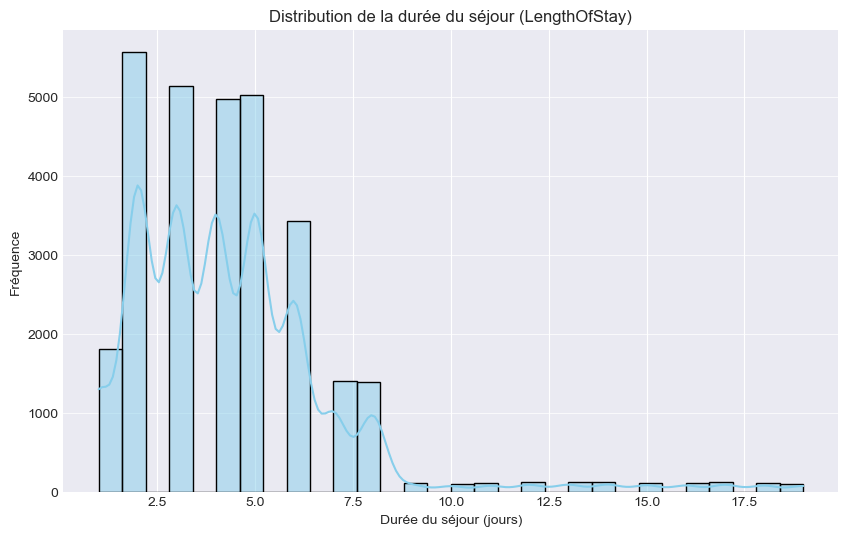

In [ ]:
#graphe de la variable cible avec la densité
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution de la durée du séjour (LengthOfStay)")
plt.xlabel("Durée du séjour (jours)")
plt.ylabel("Fréquence")
plt.grid(axis='y', alpha=0.75)
plt.show()

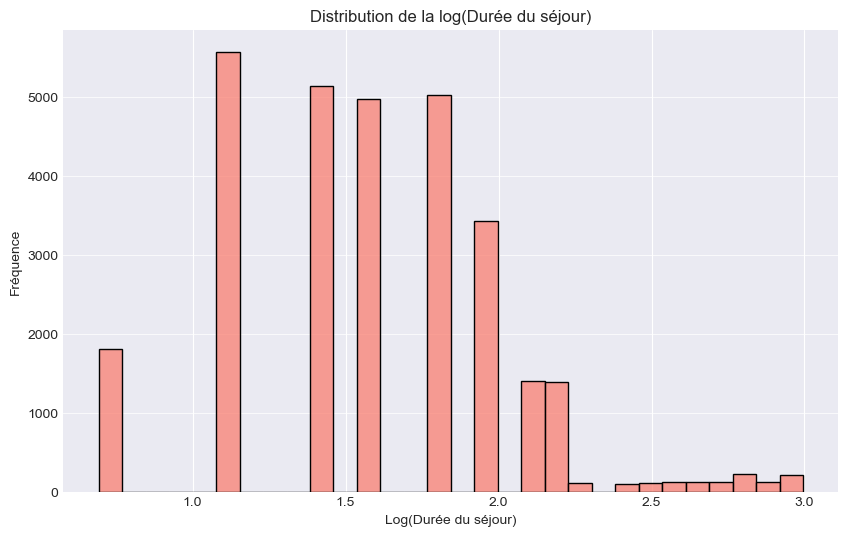

In [25]:
#Graphe de la log(variable cible) sans la densité
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(y), bins=30, kde=False, color='salmon', edgecolor='black')
plt.title("Distribution de la log(Durée du séjour)")
plt.xlabel("Log(Durée du séjour)")
plt.ylabel("Fréquence")
plt.grid(axis='y',alpha=0.75)
plt.show()

## 2.3 Lien des variables numériques avec la variable cible

In [27]:
# ============================================================================
# NUMERICAL FEATURES DEEP DIVE
# ============================================================================

print_divider("NUMERICAL FEATURES ANALYSIS", style="=")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num = df.select_dtypes(include=numerics)
df_num = df_num.drop(columns=['Smoking','noise_col','Alcohol','Family History','LengthOfStay'])  # Exclude target variable
numerical_features = df_num.columns.tolist()
print(numerical_features)


========================= NUMERICAL FEATURES ANALYSIS =========================
['Age', 'Glucose', 'Blood Pressure', 'BMI', 'Oxygen Saturation', 'Cholesterol', 'Triglycerides', 'HbA1c', 'Physical Activity', 'Diet Score', 'Stress Level', 'Sleep Hours']


In [28]:

# Create comprehensive analysis for each numerical feature
for feature in numerical_features:
    print_divider(f"Analysis of {feature.upper()}", style="-")
    
    # Statistics
    print(f"📊 Statistics for {feature}:")
    print(f"  Mean: {df[feature].mean():.2f}")
    print(f"  Median: {df[feature].median():.2f}")
    print(f"  Std Dev: {df[feature].std():.2f}")
    print(f"  Min: {df[feature].min():.0f}")
    print(f"  Max: {df[feature].max():.0f}")
    print(f"  Skewness: {df[feature].skew():.3f}")
    print(f"  Kurtosis: {df[feature].kurtosis():.3f}")

    #Enlever les Nans pour les calculs statistiques
    idx_nan = df[feature].isna()
    df_sans_nan = df[~idx_nan]
    y_sans_nan = y[~idx_nan]
    # Correlation with target
    correlation, p_value = pearsonr(df_sans_nan[feature], y_sans_nan)
    print(f"\n📈 Relationship with Charges:")
    print(f"  Pearson Correlation: {correlation:.3f} (p-value: {p_value:.6f})")
    
    spearman_corr, spearman_p = spearmanr(df[feature], y)
    print(f"  Spearman Correlation: {spearman_corr:.3f} (p-value: {spearman_p:.6f})")
    
    # Interpretation
    if abs(correlation) > 0.7:
        strength = "Strong"
    elif abs(correlation) > 0.4:
        strength = "Moderate"
    elif abs(correlation) > 0.2:
        strength = "Weak"
    else:
        strength = "Very Weak"
    
    direction = "positive" if correlation > 0 else "negative"
    print(f"  → {strength} {direction} linear relationship with length of stay.")


------------------------------- Analysis of AGE -------------------------------
📊 Statistics for Age:
  Mean: 54.62
  Median: 55.00
  Std Dev: 15.97
  Min: 10
  Max: 89
  Skewness: -0.320
  Kurtosis: -0.314

📈 Relationship with Charges:
  Pearson Correlation: 0.111 (p-value: 0.000000)
  Spearman Correlation: nan (p-value: nan)
  → Very Weak positive linear relationship with length of stay.

----------------------------- Analysis of GLUCOSE -----------------------------
📊 Statistics for Glucose:
  Mean: 123.62
  Median: 110.50
  Std Dev: 41.58
  Min: 20
  Max: 319
  Skewness: 1.355
  Kurtosis: 1.413

📈 Relationship with Charges:
  Pearson Correlation: 0.231 (p-value: 0.000000)
  Spearman Correlation: nan (p-value: nan)
  → Weak positive linear relationship with length of stay.

-------------------------- Analysis of BLOOD PRESSURE --------------------------
📊 Statistics for Blood Pressure:
  Mean: 140.46
  Median: 138.32
  Std Dev: 21.08
  Min: 74
  Max: 226
  Skewness: 0.465
  Kurtosi

Peu de corrélation directe entre les variables numériques et la variable cible.

# 3 Lien entre les données

## 3.1 Etude des valeurs manquantes

In [32]:
print_divider("Missing Values Analysis", style="=")
#organiser ça sous la forme d'un df premère colonne le nombre de NaN, deuxième colonne le nombre de lignes avec ce nombre de NaN, troisième colonne le pourcentage de lignes avec ce nombre de NaN
missing_values = df.isna().sum(axis=1).value_counts().head(10)
missing_values_df = pd.DataFrame(missing_values)
missing_values_df.columns = ['Number of Rows']
missing_values_df.index.name = 'Number of Missing Values'
missing_values_df['Percentage of Rows'] = (missing_values_df['Number of Rows'] / len(df) * 100).round(2)
display(missing_values_df)



=========================== Missing Values Analysis ===========================


Number of Rows  Percentage of Rows
Number of Missing Values                                    
0                                  13355               44.52
1                                  11675               38.92
2                                   4152               13.84
3                                    753                2.51
4                                     63                0.21
5                                      2                0.01

In [33]:
#Etude des variables ayant des Nan dans leurs valeurs
for feature in df.columns[df.isna().any()]:
    print(f"Analyse de la variable : {feature}")
    print(f"type : {df[feature].dtype}")
    print("-" * 40)

Analyse de la variable : Age
type : float64
----------------------------------------
Analyse de la variable : Gender
type : object
----------------------------------------
Analyse de la variable : Medical Condition
type : object
----------------------------------------
Analyse de la variable : Glucose
type : float64
----------------------------------------
Analyse de la variable : Blood Pressure
type : float64
----------------------------------------


In [62]:
#Séparation des catégorielles et des numériques
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = df.select_dtypes(include=numerics).columns.tolist()

## 3.2 Etude des correlations entre les variables numériques


============ Etude des correlations entre les variables numériques ============


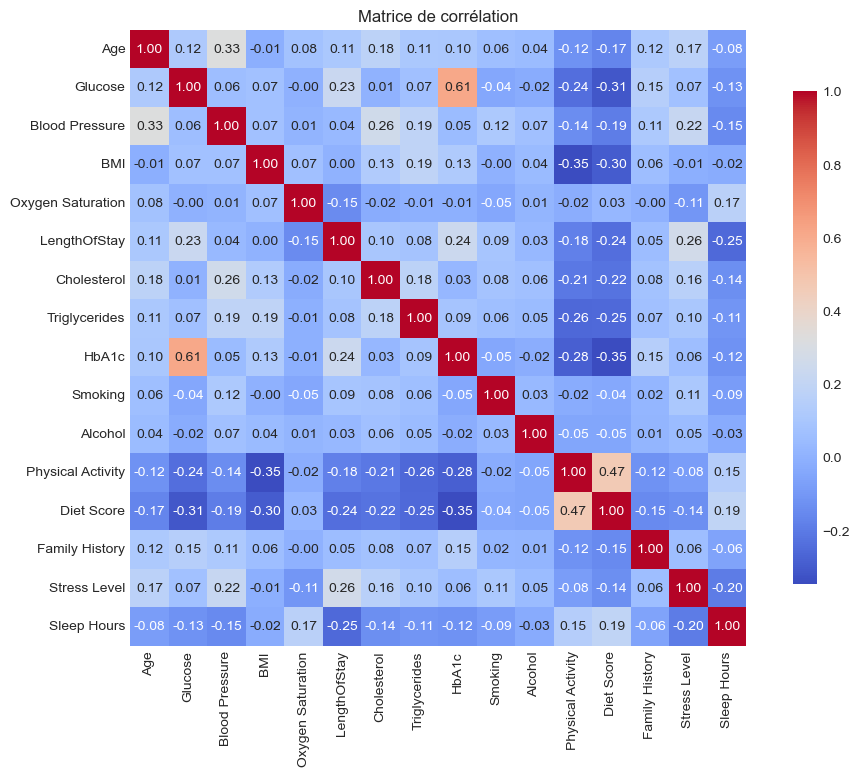

In [63]:
print_divider("Etude des correlations entre les variables numériques", style="=")
#matrice heatmap de corrélations
corr_matrix = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation")
plt.show()

In [64]:
#PCA sur les variables numériques pour voir si on peut réduire la dimensionnalité
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_num = df[num_features].dropna()  # Drop rows with NaNs for PCA
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_num_scaled)
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)


Explained variance ratio by each principal component:
[0.18767291 0.10034729 0.08995133 0.07488823 0.06105757 0.05864069
 0.05770077 0.05093273 0.04991012 0.04798491]


Pas de réduction de dimension envisageable par ACP, les variables sont peu corrélées entre elles.

In [41]:
# VIF for multicollinearity
print("\n📊 Variance Inflation Factor (Multicollinearity Check):")
vif_data = calculate_vif(df.dropna(), numerical_features)
display(vif_data)

if (vif_data['VIF'] > 10).any():
    print("⚠️ Warning: High multicollinearity detected (VIF > 10)")
elif (vif_data['VIF'] > 5).any():
    print("⚠️ Moderate multicollinearity detected (VIF > 5)")
else:
    print("✅ No significant multicollinearity detected (all VIF < 5)")


📊 Variance Inflation Factor (Multicollinearity Check):


Feature         VIF
4   Oxygen Saturation  187.159123
2      Blood Pressure   54.656871
5         Cholesterol   44.970405
7               HbA1c   39.726758
11        Sleep Hours   32.026195
3                 BMI   29.947859
1             Glucose   16.544338
6       Triglycerides   16.182242
0                 Age   15.091999
10       Stress Level    8.939029
9          Diet Score    8.770032
8   Physical Activity    6.410298

⚠️ Warning: High multicollinearity detected (VIF > 10)


Vif très élevé, il faudra penser à mettre une pénalité L1 ou L2 dans les modèles linéaires.

## 3.2 Etude des variables catégorielles

In [43]:
print_divider("Etude des variables catégorielles", style="=")

print_divider("Liste des variables catégorielles", style="-")
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features = cat_features + ['Smoking', 'Alcohol', 'Family History']  # Ajouter la variable cible aux catégorielles pour l'analyse
cat_features.remove('random_notes')  # Enlever la variable texte libre
print(cat_features)



====================== Etude des variables catégorielles ======================

---------------------- Liste des variables catégorielles ----------------------
['Gender', 'Medical Condition', 'Smoking', 'Alcohol', 'Family History']


In [49]:


print_divider("Analyse des variables catégorielles", style="-")

for feature in cat_features:
    print_divider(f"Analysis of {feature.upper()}", style="-")
    
    # Value counts
    print(f"📊 Distribution of {feature}:")
    value_counts = df[feature].value_counts()
    for category, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")
    
    # Statistics by category
    print(f"\n📈 LengthOfStay Statistics by {feature}:")
    stats_by_category = df.groupby(feature)['LengthOfStay'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    display(stats_by_category)
    
    # ANOVA test
    groups = [group['LengthOfStay'].values for name, group in df.groupby(feature)]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\n🔬 ANOVA Test:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.6f}")
    
    if p_value < 0.05:
        print(f"  → Significant difference in Length Of Stay across {feature} categories (p < 0.05)")
    else:
        print(f"  → No significant difference in Length Of Stay across {feature} categories")
    
    # Effect size (Eta-squared)
    ss_between = sum(len(group) * (group.mean() - df['LengthOfStay'].mean())**2 
                    for group in groups)
    ss_total = sum((df['LengthOfStay'] - df['LengthOfStay'].mean())**2)
    eta_squared = ss_between / ss_total
    print(f"  Effect size (η²): {eta_squared:.4f}")
    
    if eta_squared > 0.14:
        effect = "Large"
    elif eta_squared > 0.06:
        effect = "Medium"
    else:
        effect = "Small"
    print(f"  → {effect} effect size")


--------------------- Analyse des variables catégorielles ---------------------

------------------------------ Analysis of GENDER ------------------------------
📊 Distribution of Gender:
  Female: 12865 (42.9%)
  Male: 12635 (42.1%)

📈 LengthOfStay Statistics by Gender:


count  mean  median   std  min  max
Gender                                     
Female  12865  4.40     4.0  2.78    1   19
Male    12635  4.43     4.0  2.75    1   19

[array([4, 3, 6, ..., 1, 3, 4], dtype=int64), array([6, 2, 5, ..., 2, 4, 3], dtype=int64)]

🔬 ANOVA Test:
  F-statistic: 0.5620
  P-value: 0.453448
  → No significant difference in Length Of Stay across Gender categories
  Effect size (η²): 0.0000
  → Small effect size

------------------------ Analysis of MEDICAL CONDITION ------------------------
📊 Distribution of Medical Condition:
  Hypertension: 7120 (23.7%)
  Diabetes: 6417 (21.4%)
  Obesity: 3857 (12.9%)
  Healthy: 3039 (10.1%)
  Asthma: 2037 (6.8%)
  Arthritis: 1796 (6.0%)
  Cancer: 1234 (4.1%)

📈 LengthOfStay Statistics by Medical Condition:


count   mean  median   std  min  max
Medical Condition                                      
Arthritis           1796   3.48     3.0  1.12    2    5
Asthma              2037   3.97     4.0  1.43    2    6
Cancer              1234  12.96    13.0  3.70    7   19
Diabetes            6417   5.52     6.0  1.71    3    8
Healthy             3039   1.49     1.0  0.50    1    2
Hypertension        7120   4.01     4.0  1.42    2    6
Obesity             3857   3.51     4.0  1.12    2    5

[array([2, 2, 2, ..., 2, 4, 4], dtype=int64), array([2, 6, 3, ..., 4, 4, 4], dtype=int64), array([19,  8, 14, ..., 18, 18, 16], dtype=int64), array([6, 5, 6, ..., 7, 3, 3], dtype=int64), array([2, 1, 1, ..., 1, 2, 1], dtype=int64), array([4, 5, 3, ..., 2, 3, 4], dtype=int64), array([5, 3, 3, ..., 4, 5, 4], dtype=int64)]

🔬 ANOVA Test:
  F-statistic: 8932.4381
  P-value: 0.000000
  → Significant difference in Length Of Stay across Medical Condition categories (p < 0.05)
  Effect size (η²): 0.5687
  → Large effect size

----------------------------- Analysis of SMOKING -----------------------------
📊 Distribution of Smoking:
  0: 21607 (72.0%)
  1: 8393 (28.0%)

📈 LengthOfStay Statistics by Smoking:


count  mean  median   std  min  max
Smoking                                     
0        21607  4.25     4.0  2.58    1   19
1         8393  4.83     4.0  3.14    1   19

[array([6, 2, 2, ..., 1, 3, 3], dtype=int64), array([ 5,  3, 19, ...,  2,  4,  4], dtype=int64)]

🔬 ANOVA Test:
  F-statistic: 271.0711
  P-value: 0.000000
  → Significant difference in Length Of Stay across Smoking categories (p < 0.05)
  Effect size (η²): 0.0090
  → Small effect size

----------------------------- Analysis of ALCOHOL -----------------------------
📊 Distribution of Alcohol:
  0: 22844 (76.1%)
  1: 7156 (23.9%)

📈 LengthOfStay Statistics by Alcohol:


count  mean  median   std  min  max
Alcohol                                     
0        22844  4.37     4.0  2.72    1   19
1         7156  4.57     4.0  2.88    1   19

[array([6, 2, 2, ..., 3, 3, 4], dtype=int64), array([4, 3, 2, ..., 2, 4, 2], dtype=int64)]

🔬 ANOVA Test:
  F-statistic: 29.2230
  P-value: 0.000000
  → Significant difference in Length Of Stay across Alcohol categories (p < 0.05)
  Effect size (η²): 0.0010
  → Small effect size

-------------------------- Analysis of FAMILY HISTORY --------------------------
📊 Distribution of Family History:
  0: 16817 (56.1%)
  1: 13183 (43.9%)

📈 LengthOfStay Statistics by Family History:


count  mean  median   std  min  max
Family History                                     
0               16817  4.29     4.0  2.99    1   19
1               13183  4.57     4.0  2.43    1   19

[array([6, 2, 5, ..., 4, 3, 3], dtype=int64), array([2, 3, 2, ..., 4, 2, 4], dtype=int64)]

🔬 ANOVA Test:
  F-statistic: 79.1659
  P-value: 0.000000
  → Significant difference in Length Of Stay across Family History categories (p < 0.05)
  Effect size (η²): 0.0026
  → Small effect size


In [52]:
# ============================================================================
# CATEGORICAL FEATURES VISUALIZATION
# ============================================================================

# Defensive handling: ensure we have at least one categorical feature
n_rows = max(1, len(cat_features))

# Create subplots for categorical analysis
fig = make_subplots(
    rows=n_rows, cols=3,
    subplot_titles=[f'{feat} - {plot}' 
                    for feat in cat_features 
                    for plot in ['Distribution', 'LengthOfStay Box Plot', 'LengthOfStay Violin Plot']],
    specs=[[{'type': 'bar'}, {'type': 'box'}, {'type': 'violin'}]
           for _ in range(n_rows)],
)

# Adjust height based on number of rows
fig_height = max(600, 300 * n_rows)

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

for idx, feature in enumerate(cat_features, 1):
    # Bar plot for distribution
    value_counts = df[feature].value_counts()
    fig.add_trace(
        go.Bar(x=value_counts.index, y=value_counts.values,
              marker_color=colors[:len(value_counts.index)], showlegend=False),
        row=idx, col=1,
    )
    
    # Box plot for LengthOfStay by category
    for category in df[feature].unique():
        fig.add_trace(
            go.Box(y=df[df[feature] == category]['LengthOfStay'],
                  name=str(category), showlegend=False),
            row=idx, col=2,
        )
    
    # Violin plot for LengthOfStay by category
    for category in df[feature].unique():
        fig.add_trace(
            go.Violin(y=df[df[feature] == category]['LengthOfStay'],
                     name=str(category), showlegend=False),
            row=idx, col=3,
        )

fig.update_layout(height=fig_height, title_text="Comprehensive Categorical Features Analysis")
fig.show()

On conclut de cette analyse que la principale variable catégorielle influençant la durée du séjour est son affection à telle ou telle maladie. 

- La variable "Medical Condition" doit être prise en compte dans les modèles prédictifs de la durée de séjour hospitalier.
- Le fait d'être fumeur, ou alcoolique a une influence, mais moindre, sur la durée du séjour.
- Les antécédents ont une influence modérée sur la durée du séjour.
- Le genre n'a pas d'influence significative sur la durée du séjour.

In [65]:
df.columns

Index(['Age', 'Gender', 'Medical Condition', 'Glucose', 'Blood Pressure',
       'BMI', 'Oxygen Saturation', 'LengthOfStay', 'Cholesterol',
       'Triglycerides', 'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity',
       'Diet Score', 'Family History', 'Stress Level', 'Sleep Hours'],
      dtype='object')

# 4. Features Engineering

In [ ]:

print("✅ Core libraries imported successfully")

# --- Data Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set visualization styles for professional output
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pio.templates.default = "plotly_white"

print("✅ Visualization libraries configured")

# --- Statistical Analysis Libraries ---
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson
from scipy.stats import pearsonr, spearmanr, kendalltau
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("✅ Statistical libraries loaded")

# --- Machine Learning Libraries ---
# Preprocessing
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold, 
    cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, 
    QuantileTransformer, PowerTransformer, LabelEncoder, OneHotEncoder
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import (
    SelectKBest, f_regression, mutual_info_regression,
    RFE, RFECV, SelectFromModel
)

# Models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    HuberRegressor, RANSACRegressor, TheilSenRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, AdaBoostRegressor,
    VotingRegressor, StackingRegressor, BaggingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error, explained_variance_score,
    max_error, median_absolute_error
)

print("✅ Scikit-learn modules loaded")

# --- Advanced ML Libraries ---
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor, Pool

print("✅ Advanced ML libraries loaded")

# --- Deep Learning Libraries ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Check GPU availability
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

# --- AutoML Libraries ---
try:
    from autogluon.tabular import TabularPredictor
    print("✅ AutoGluon loaded")
except:
    print("⚠️ AutoGluon not available")

# --- Model Interpretation Libraries ---
import shap
from lime.lime_tabular import LimeTabularExplainer
import eli5
from eli5.sklearn import PermutationImportance

print("✅ Explainable AI libraries loaded")

# --- Utility Functions ---
import time
import gc
from tqdm import tqdm
tqdm.pandas()

# --- Set Random Seeds for Reproducibility ---
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

print("\n" + "="*80)
print("🎉 ALL LIBRARIES LOADED SUCCESSFULLY!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🔧 Python Version: {sys.version.split()[0]}")
print(f"📊 Pandas Version: {pd.__version__}")
print(f"🔢 NumPy Version: {np.__version__}")
print("="*80)


✅ Core libraries imported successfully
✅ Visualization libraries configured
✅ Statistical libraries loaded
✅ Scikit-learn modules loaded


ModuleNotFoundError: No module named 'xgboost'